In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter 

In [2]:
file = 'images/predicted.jpg'
first_file = cv2.imread('images/0.png')
first_file = cv2.cvtColor(first_file, cv2.COLOR_BGR2RGB)

# OpenCV

In [3]:
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Pillow

In [23]:
with Image.open(file) as img:
    img.load()

In [24]:
def info(img):
    return 'Format: {}, size: {}, mode: {}'.format(img.format, img.size, img.mode)

In [26]:
print(info(img))
new_img = img.filter(ImageFilter.SHARPEN)

Format: JPEG, size: (256, 256), mode: RGB


In [4]:
kernel = np.array([[0, -1, 0], 
                   [-1, 5, -1], 
                   [0, -1, 0]])
new_img = cv2.filter2D(img, -1, kernel)
only_res = cv2.resize(img, (2560, 2560))
res = cv2.resize(new_img, (2560, 2560))
cv2.imwrite('images/resize.jpg', cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
cv2.imwrite('images/orig.jpg', cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
cv2.imwrite('images/only_res.jpg', cv2.cvtColor(only_res, cv2.COLOR_BGR2RGB))

True

In [ ]:
kernel = np.array([[0, -1, 0], 
                   [-1, 5, -1], 
                   [0, -1, 0]])

img = cv2.filter2D(img, -1, kernel)
img = cv2.resize(img, (2560, 2560))

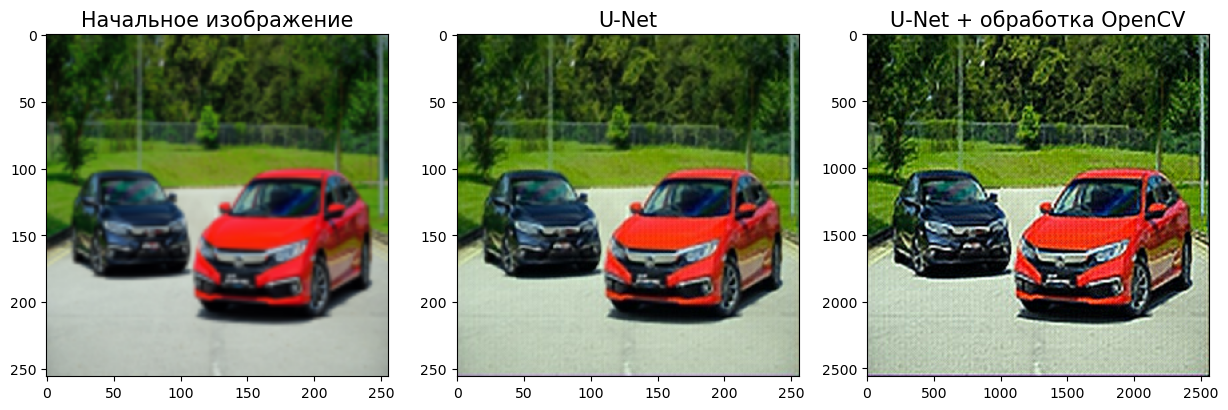

In [7]:

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Начальное изображение', fontsize = 15)
plt.imshow(first_file)
# plt.axis('off')
plt.subplot(1,3,2)
plt.title('U-Net', fontsize = 15)
plt.imshow(img)
# plt.axis('off')
plt.subplot(1,3,3)
plt.title('U-Net + обработка OpenCV', fontsize = 15)
plt.imshow(res)
# plt.axis('off')
plt.show()

In [2]:
from keras.models import Sequential, load_model
model = load_model('final_model_2.h5')

In [7]:
def some_predict():
    def plot_for_single(low,predicted,proc,i):
        plt.figure(figsize=(15,15))
        plt.subplot(1,3,1)
        plt.title('Начальное изображение', fontsize = 15)
        plt.imshow(low)
        plt.subplot(1,3,2)
        plt.title('U-Net', fontsize = 15)
        plt.imshow(predicted)
        plt.subplot(1,3,3)
        plt.title('U-Net + обработка OpenCV', fontsize = 15)
        plt.imshow(proc)
        plt.savefig('examples/e_'+str(i))
        plt.show()

    SIZE = 256
    
    for i in range(0, 10):
        path = '../../data/image-super-resolution/dataset/train/low_res/'+str(i)+'.png'
        img = cv2.imread(path,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        predicted = np.clip(model.predict(img.reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
        
        kernel = np.array([[0, -1, 0], 
                           [-1, 5, -1], 
                           [0, -1, 0]])

        proc = cv2.filter2D(predicted, -1, kernel)
        proc = cv2.resize(proc, (2560, 2560))
        
        plot_for_single(img, predicted, proc, i)

1/1 [==============================] - 0s 97ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


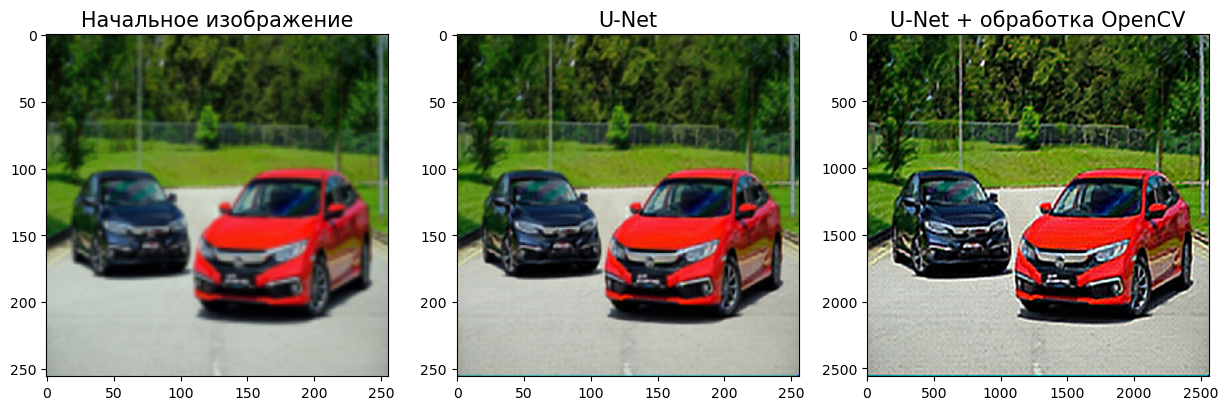

1/1 [==============================] - 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


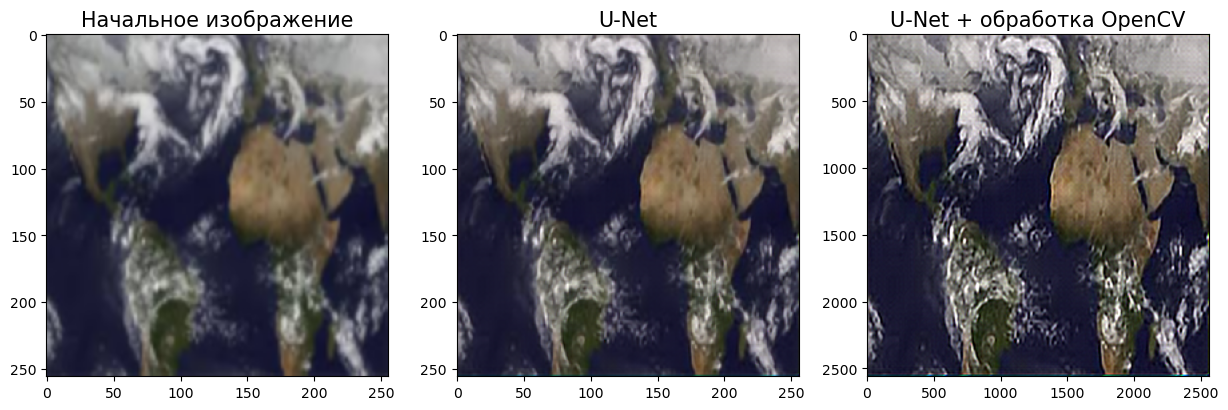

1/1 [==============================] - 0s 51ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


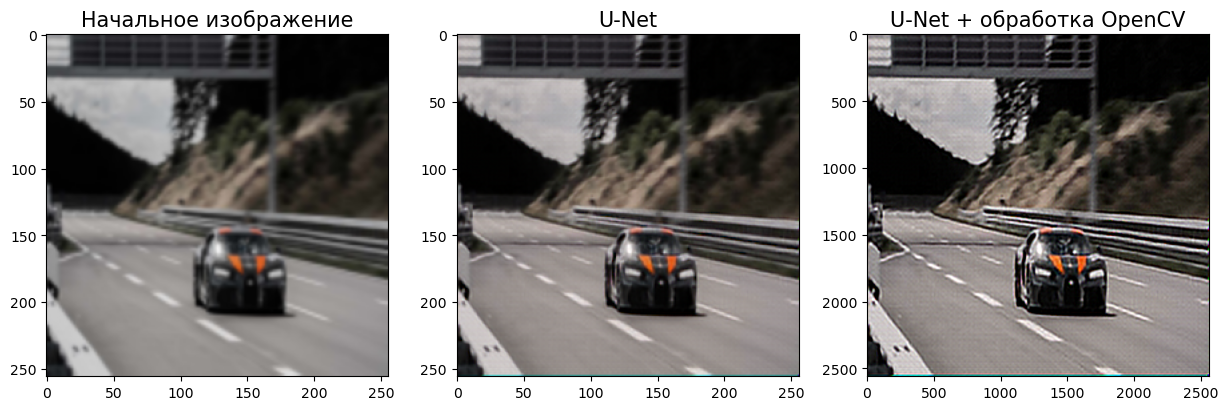

1/1 [==============================] - 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


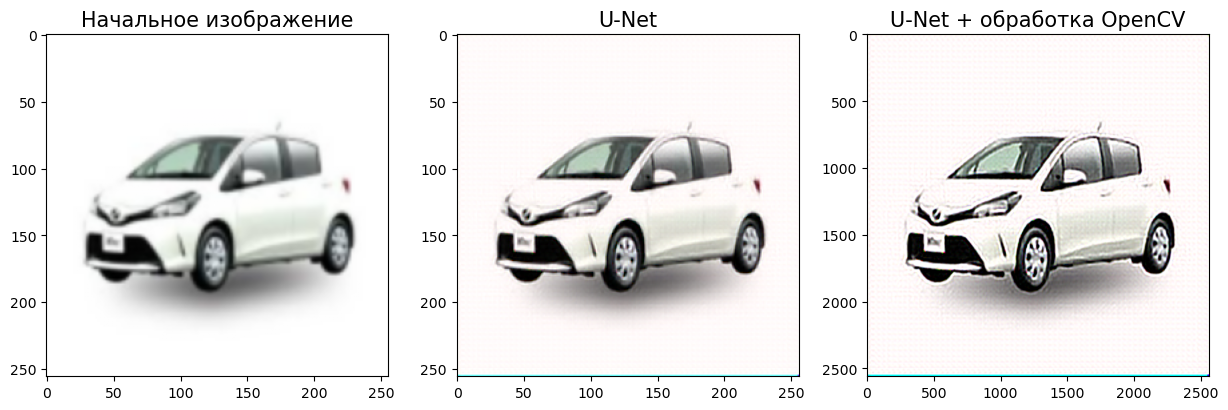

1/1 [==============================] - 0s 17ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


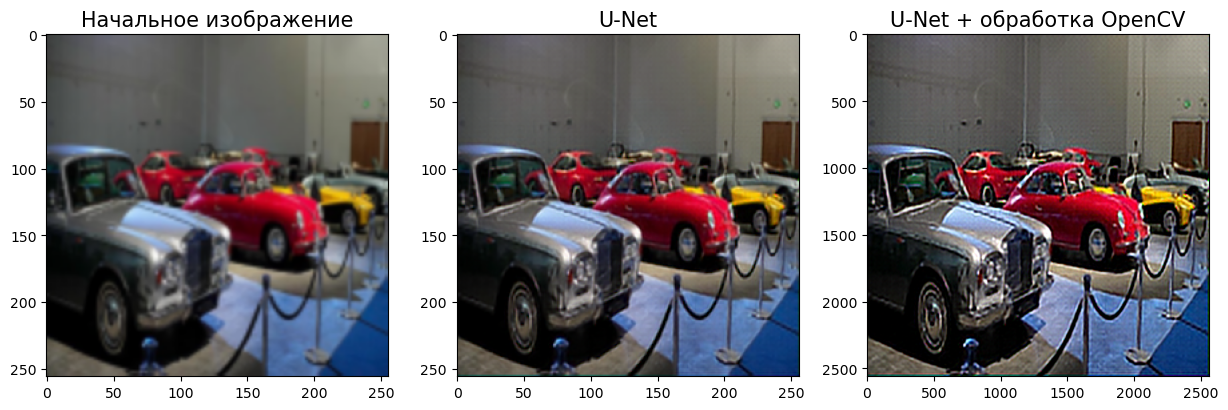

1/1 [==============================] - 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


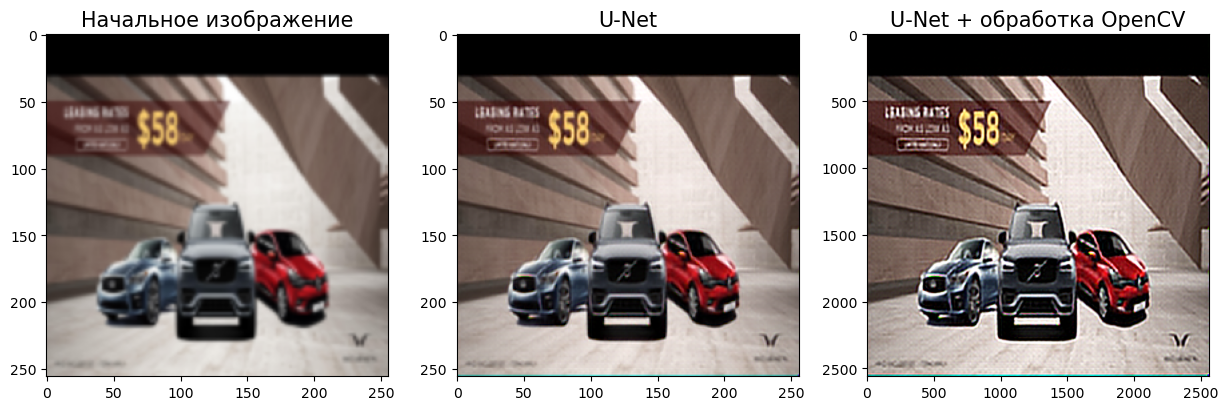

1/1 [==============================] - 0s 18ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


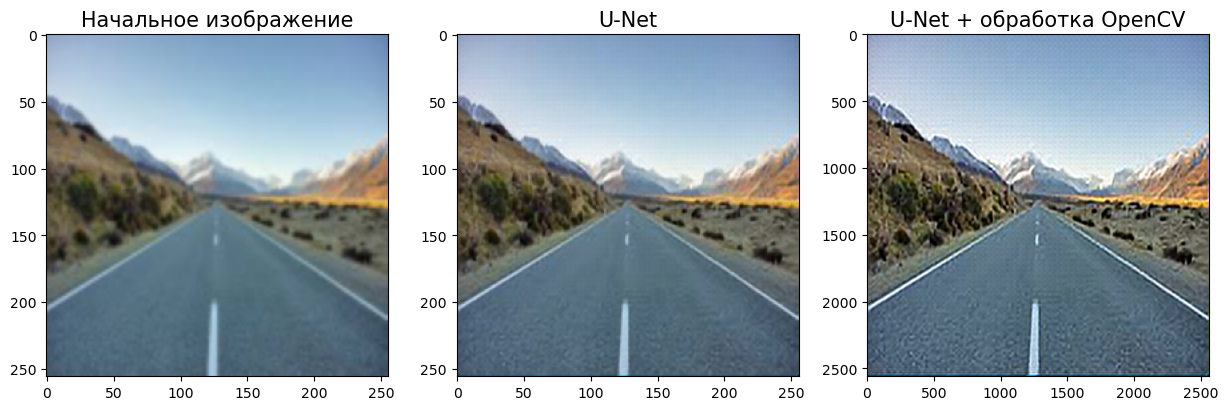

1/1 [==============================] - 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


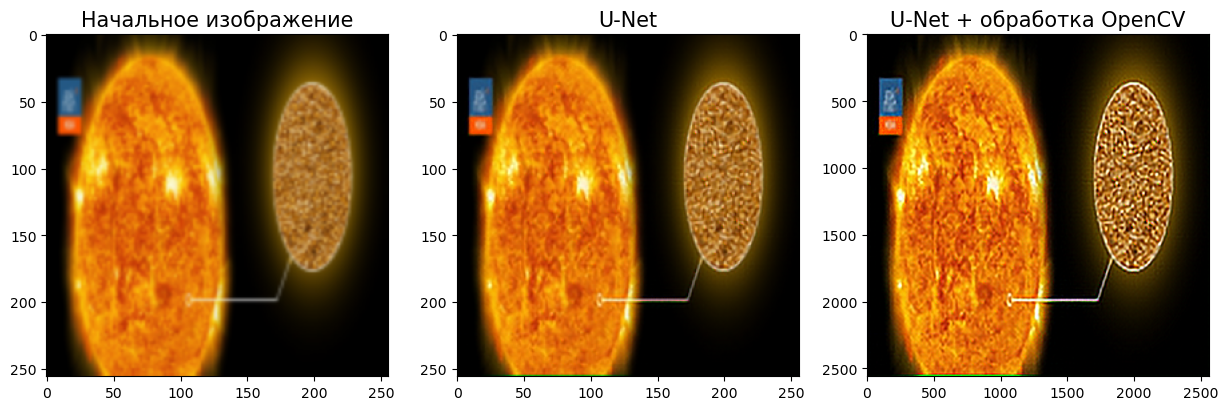

1/1 [==============================] - 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


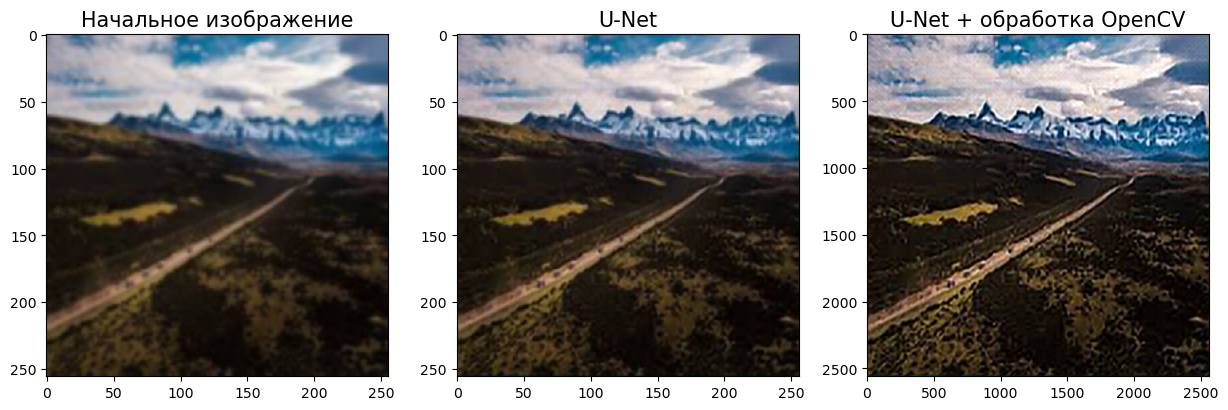

1/1 [==============================] - 0s 20ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


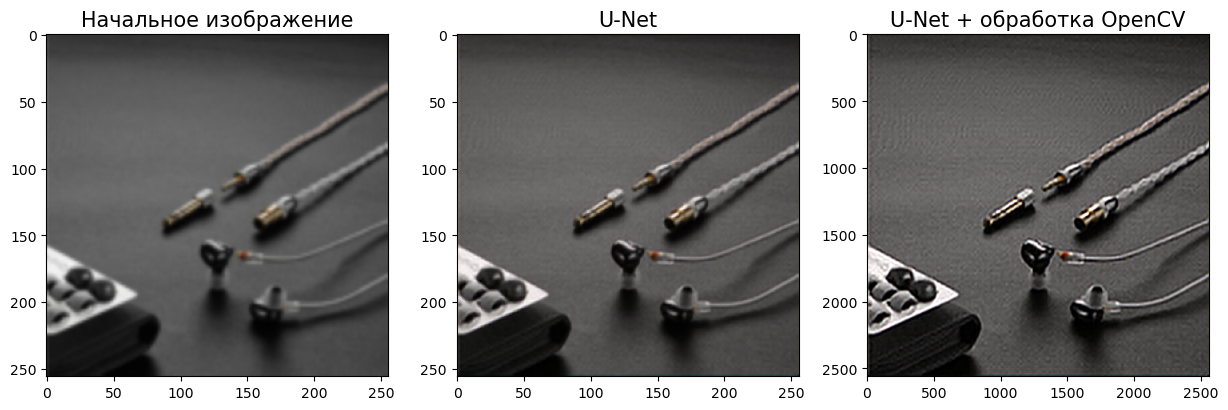

In [8]:
some_predict()